In [1]:
#initial import

#THIS CODE WAS TAKEN FROM DEEPCHEM ()
import os
import sys
import deepchem as dc
from deepchem.utils.save import load_from_disk

In [2]:
#array of required molecules

current_dir = os.path.dirname(os.path.realpath("__file__"))
dc.utils.download_url("https://s3-us-west-1.amazonaws.com/deepchem.io/datasets/desc_canvas_aug30.csv",
                      current_dir)
dataset_file = "desc_canvas_aug30.csv"
dataset = load_from_disk(dataset_file)
num_display=10
pretty_columns = (
    "[" + ",".join(["'%s'" % column for column in dataset.columns.values[:num_display]])
    + ",...]")

dc.utils.download_url("https://s3-us-west-1.amazonaws.com/deepchem.io/datasets/crystal_desc_canvas_aug30.csv",
                      current_dir)
crystal_dataset_file = "crystal_desc_canvas_aug30.csv"
crystal_dataset = load_from_disk(crystal_dataset_file)

print("Columns of dataset: %s" % pretty_columns)
print("Number of examples in dataset: %s" % str(dataset.shape[0]))
print("Number of examples in crystal dataset: %s" % str(crystal_dataset.shape[0]))

Columns of dataset: ['mol','CID','Class','Model','pIC50','MW','AlogP','HBA','HBD','RB',...]
Number of examples in dataset: 1522
Number of examples in crystal dataset: 25


In [3]:
#more imports and helper methods

import tempfile
from rdkit import Chem
from rdkit.Chem import Draw
from itertools import islice
from IPython.display import Image, display, HTML

def display_images(filenames):
    """Helper to pretty-print images."""
    for filename in filenames:
        display(Image(filename))

def mols_to_pngs(mols, basename="test"):
    """Helper to write RDKit mols to png files."""
    filenames = []
    for i, mol in enumerate(mols):
        filename = "BACE_%s%d.png" % (basename, i)
        Draw.MolToFile(mol, filename)
        filenames.append(filename)
    return filenames

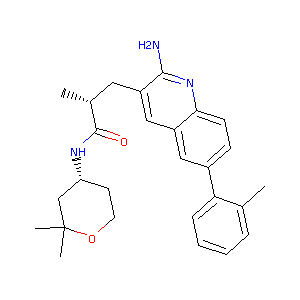

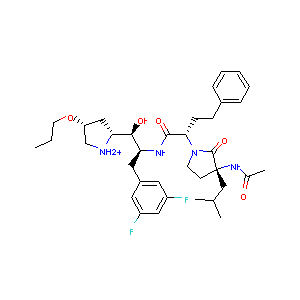

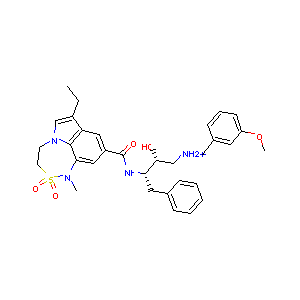

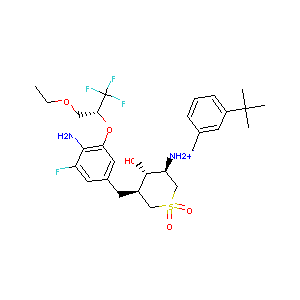

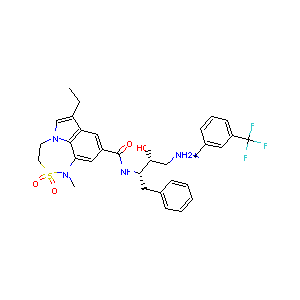

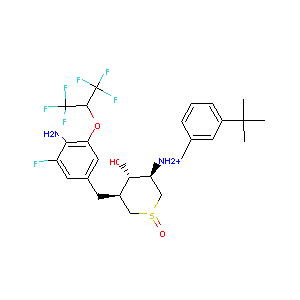

In [4]:
# visualising some chemicals

num_to_display = 6
molecules = []
for _, data in islice(dataset.iterrows(), num_to_display):
    molecules.append(Chem.MolFromSmiles(data["mol"]))
display_images(mols_to_pngs(molecules, basename="dataset"))

In [5]:
#All the paramaters

user_specified_features = ['MW','AlogP','HBA','HBD','RB','HeavyAtomCount','ChiralCenterCount','ChiralCenterCountAllPossible','RingCount','PSA','Estate','MR','Polar','sLi_Key','ssBe_Key','ssssBem_Key','sBH2_Key','ssBH_Key','sssB_Key','ssssBm_Key','sCH3_Key','dCH2_Key','ssCH2_Key','tCH_Key','dsCH_Key','aaCH_Key','sssCH_Key','ddC_Key','tsC_Key','dssC_Key','aasC_Key','aaaC_Key','ssssC_Key','sNH3_Key','sNH2_Key','ssNH2_Key','dNH_Key','ssNH_Key','aaNH_Key','tN_Key','sssNH_Key','dsN_Key','aaN_Key','sssN_Key','ddsN_Key','aasN_Key','ssssN_Key','daaN_Key','sOH_Key','dO_Key','ssO_Key','aaO_Key','aOm_Key','sOm_Key','sF_Key','sSiH3_Key','ssSiH2_Key','sssSiH_Key','ssssSi_Key','sPH2_Key','ssPH_Key','sssP_Key','dsssP_Key','ddsP_Key','sssssP_Key','sSH_Key','dS_Key','ssS_Key','aaS_Key','dssS_Key','ddssS_Key','ssssssS_Key','Sm_Key','sCl_Key','sGeH3_Key','ssGeH2_Key','sssGeH_Key','ssssGe_Key','sAsH2_Key','ssAsH_Key','sssAs_Key','dsssAs_Key','ddsAs_Key','sssssAs_Key','sSeH_Key','dSe_Key','ssSe_Key','aaSe_Key','dssSe_Key','ssssssSe_Key','ddssSe_Key','sBr_Key','sSnH3_Key','ssSnH2_Key','sssSnH_Key','ssssSn_Key','sI_Key','sPbH3_Key','ssPbH2_Key','sssPbH_Key','ssssPb_Key','sLi_Cnt','ssBe_Cnt','ssssBem_Cnt','sBH2_Cnt','ssBH_Cnt','sssB_Cnt','ssssBm_Cnt','sCH3_Cnt','dCH2_Cnt','ssCH2_Cnt','tCH_Cnt','dsCH_Cnt','aaCH_Cnt','sssCH_Cnt','ddC_Cnt','tsC_Cnt','dssC_Cnt','aasC_Cnt','aaaC_Cnt','ssssC_Cnt','sNH3_Cnt','sNH2_Cnt','ssNH2_Cnt','dNH_Cnt','ssNH_Cnt','aaNH_Cnt','tN_Cnt','sssNH_Cnt','dsN_Cnt','aaN_Cnt','sssN_Cnt','ddsN_Cnt','aasN_Cnt','ssssN_Cnt','daaN_Cnt','sOH_Cnt','dO_Cnt','ssO_Cnt','aaO_Cnt','aOm_Cnt','sOm_Cnt','sF_Cnt','sSiH3_Cnt','ssSiH2_Cnt','sssSiH_Cnt','ssssSi_Cnt','sPH2_Cnt','ssPH_Cnt','sssP_Cnt','dsssP_Cnt','ddsP_Cnt','sssssP_Cnt','sSH_Cnt','dS_Cnt','ssS_Cnt','aaS_Cnt','dssS_Cnt','ddssS_Cnt','ssssssS_Cnt','Sm_Cnt','sCl_Cnt','sGeH3_Cnt','ssGeH2_Cnt','sssGeH_Cnt','ssssGe_Cnt','sAsH2_Cnt','ssAsH_Cnt','sssAs_Cnt','dsssAs_Cnt','ddsAs_Cnt','sssssAs_Cnt','sSeH_Cnt','dSe_Cnt','ssSe_Cnt','aaSe_Cnt','dssSe_Cnt','ssssssSe_Cnt','ddssSe_Cnt','sBr_Cnt','sSnH3_Cnt','ssSnH2_Cnt','sssSnH_Cnt','ssssSn_Cnt','sI_Cnt','sPbH3_Cnt','ssPbH2_Cnt','sssPbH_Cnt','ssssPb_Cnt','sLi_Sum','ssBe_Sum','ssssBem_Sum','sBH2_Sum','ssBH_Sum','sssB_Sum','ssssBm_Sum','sCH3_Sum','dCH2_Sum','ssCH2_Sum','tCH_Sum','dsCH_Sum','aaCH_Sum','sssCH_Sum','ddC_Sum','tsC_Sum','dssC_Sum','aasC_Sum','aaaC_Sum','ssssC_Sum','sNH3_Sum','sNH2_Sum','ssNH2_Sum','dNH_Sum','ssNH_Sum','aaNH_Sum','tN_Sum','sssNH_Sum','dsN_Sum','aaN_Sum','sssN_Sum','ddsN_Sum','aasN_Sum','ssssN_Sum','daaN_Sum','sOH_Sum','dO_Sum','ssO_Sum','aaO_Sum','aOm_Sum','sOm_Sum','sF_Sum','sSiH3_Sum','ssSiH2_Sum','sssSiH_Sum','ssssSi_Sum','sPH2_Sum','ssPH_Sum','sssP_Sum','dsssP_Sum','ddsP_Sum','sssssP_Sum','sSH_Sum','dS_Sum','ssS_Sum','aaS_Sum','dssS_Sum','ddssS_Sum','ssssssS_Sum','Sm_Sum','sCl_Sum','sGeH3_Sum','ssGeH2_Sum','sssGeH_Sum','ssssGe_Sum','sAsH2_Sum','ssAsH_Sum','sssAs_Sum','dsssAs_Sum','ddsAs_Sum','sssssAs_Sum','sSeH_Sum','dSe_Sum','ssSe_Sum','aaSe_Sum','dssSe_Sum','ssssssSe_Sum','ddssSe_Sum','sBr_Sum','sSnH3_Sum','ssSnH2_Sum','sssSnH_Sum','ssssSn_Sum','sI_Sum','sPbH3_Sum','ssPbH2_Sum','sssPbH_Sum','ssssPb_Sum','sLi_Avg','ssBe_Avg','ssssBem_Avg','sBH2_Avg','ssBH_Avg','sssB_Avg','ssssBm_Avg','sCH3_Avg','dCH2_Avg','ssCH2_Avg','tCH_Avg','dsCH_Avg','aaCH_Avg','sssCH_Avg','ddC_Avg','tsC_Avg','dssC_Avg','aasC_Avg','aaaC_Avg','ssssC_Avg','sNH3_Avg','sNH2_Avg','ssNH2_Avg','dNH_Avg','ssNH_Avg','aaNH_Avg','tN_Avg','sssNH_Avg','dsN_Avg','aaN_Avg','sssN_Avg','ddsN_Avg','aasN_Avg','ssssN_Avg','daaN_Avg','sOH_Avg','dO_Avg','ssO_Avg','aaO_Avg','aOm_Avg','sOm_Avg','sF_Avg','sSiH3_Avg','ssSiH2_Avg','sssSiH_Avg','ssssSi_Avg','sPH2_Avg','ssPH_Avg','sssP_Avg','dsssP_Avg','ddsP_Avg','sssssP_Avg','sSH_Avg','dS_Avg','ssS_Avg','aaS_Avg','dssS_Avg','ddssS_Avg','ssssssS_Avg','Sm_Avg','sCl_Avg','sGeH3_Avg','ssGeH2_Avg','sssGeH_Avg','ssssGe_Avg','sAsH2_Avg','ssAsH_Avg','sssAs_Avg','dsssAs_Avg','ddsAs_Avg','sssssAs_Avg','sSeH_Avg','dSe_Avg','ssSe_Avg','aaSe_Avg','dssSe_Avg','ssssssSe_Avg','ddssSe_Avg','sBr_Avg','sSnH3_Avg','ssSnH2_Avg','sssSnH_Avg','ssssSn_Avg','sI_Avg','sPbH3_Avg','ssPbH2_Avg','sssPbH_Avg','ssssPb_Avg','First Zagreb (ZM1)','First Zagreb index by valence vertex degrees (ZM1V)','Second Zagreb (ZM2)','Second Zagreb index by valence vertex degrees (ZM2V)','Polarity (Pol)','Narumi Simple Topological (NST)','Narumi Harmonic Topological (NHT)','Narumi Geometric Topological (NGT)','Total structure connectivity (TSC)','Wiener (W)','Mean Wiener (MW)','Xu (Xu)','Quadratic (QIndex)','Radial centric (RC)','Mean Square Distance Balaban (MSDB)','Superpendentic (SP)','Harary (Har)','Log of product of row sums (LPRS)','Pogliani (Pog)','Schultz Molecular Topological (SMT)','Schultz Molecular Topological by valence vertex degrees (SMTV)','Mean Distance Degree Deviation (MDDD)','Ramification (Ram)','Gutman Molecular Topological (GMT)','Gutman MTI by valence vertex degrees (GMTV)','Average vertex distance degree (AVDD)','Unipolarity (UP)','Centralization (CENT)','Variation (VAR)','Molecular electrotopological variation (MEV)','Maximal electrotopological positive variation (MEPV)','Maximal electrotopological negative variation (MENV)','Eccentric connectivity (ECCc)','Eccentricity (ECC)','Average eccentricity (AECC)','Eccentric (DECC)','Valence connectivity index chi-0 (vX0)','Valence connectivity index chi-1 (vX1)','Valence connectivity index chi-2 (vX2)','Valence connectivity index chi-3 (vX3)','Valence connectivity index chi-4 (vX4)','Valence connectivity index chi-5 (vX5)','Average valence connectivity index chi-0 (AvX0)','Average valence connectivity index chi-1 (AvX1)','Average valence connectivity index chi-2 (AvX2)','Average valence connectivity index chi-3 (AvX3)','Average valence connectivity index chi-4 (AvX4)','Average valence connectivity index chi-5 (AvX5)','Quasi Wiener (QW)','First Mohar (FM)','Second Mohar (SM)','Spanning tree number (STN)','Kier benzene-likeliness index (KBLI)','Topological charge index of order 1 (TCI1)','Topological charge index of order 2 (TCI2)','Topological charge index of order 3 (TCI3)','Topological charge index of order 4 (TCI4)','Topological charge index of order 5 (TCI5)','Topological charge index of order 6 (TCI6)','Topological charge index of order 7 (TCI7)','Topological charge index of order 8 (TCI8)','Topological charge index of order 9 (TCI9)','Topological charge index of order 10 (TCI10)','Mean topological charge index of order 1 (MTCI1)','Mean topological charge index of order 2 (MTCI2)','Mean topological charge index of order 3 (MTCI3)','Mean topological charge index of order 4 (MTCI4)','Mean topological charge index of order 5 (MTCI5)','Mean topological charge index of order 6 (MTCI6)','Mean topological charge index of order 7 (MTCI7)','Mean topological charge index of order 8 (MTCI8)','Mean topological charge index of order 9 (MTCI9)','Mean topological charge index of order 10 (MTCI10)','Global topological charge (GTC)','Hyper-distance-path index (HDPI)','Reciprocal hyper-distance-path index (RHDPI)','Square reciprocal distance sum (SRDS)','Modified Randic connectivity (MRC)','Balaban centric (BC)','Lopping centric (LC)','Kier Hall electronegativity (KHE)','Sum of topological distances between N..N (STD(N N))','Sum of topological distances between N..O (STD(N O))','Sum of topological distances between N..S (STD(N S))','Sum of topological distances between N..P (STD(N P))','Sum of topological distances between N..F (STD(N F))','Sum of topological distances between N..Cl (STD(N Cl))','Sum of topological distances between N..Br (STD(N Br))','Sum of topological distances between N..I (STD(N I))','Sum of topological distances between O..O (STD(O O))','Sum of topological distances between O..S (STD(O S))','Sum of topological distances between O..P (STD(O P))','Sum of topological distances between O..F (STD(O F))','Sum of topological distances between O..Cl (STD(O Cl))','Sum of topological distances between O..Br (STD(O Br))','Sum of topological distances between O..I (STD(O I))','Sum of topological distances between S..S (STD(S S))','Sum of topological distances between S..P (STD(S P))','Sum of topological distances between S..F (STD(S F))','Sum of topological distances between S..Cl (STD(S Cl))','Sum of topological distances between S..Br (STD(S Br))','Sum of topological distances between S..I (STD(S I))','Sum of topological distances between P..P (STD(P P))','Sum of topological distances between P..F (STD(P F))','Sum of topological distances between P..Cl (STD(P Cl))','Sum of topological distances between P..Br (STD(P Br))','Sum of topological distances between P..I (STD(P I))','Sum of topological distances between F..F (STD(F F))','Sum of topological distances between F..Cl (STD(F Cl))','Sum of topological distances between F..Br (STD(F Br))','Sum of topological distances between F..I (STD(F I))','Sum of topological distances between Cl..Cl (STD(Cl Cl))','Sum of topological distances between Cl..Br (STD(Cl Br))','Sum of topological distances between Cl..I (STD(Cl I))','Sum of topological distances between Br..Br (STD(Br Br))','Sum of topological distances between Br..I (STD(Br I))','Sum of topological distances between I..I (STD(I I))','Wiener-type index from Z weighted distance matrix - Barysz matrix (WhetZ)','Wiener-type index from electronegativity weighted distance matrix (Whete)','Wiener-type index from mass weighted distance matrix (Whetm)','Wiener-type index from van der waals weighted distance matrix (Whetv)','Wiener-type index from polarizability weighted distance matrix (Whetp)','Balaban-type index from Z weighted distance matrix - Barysz matrix (JhetZ)','Balaban-type index from electronegativity weighted distance matrix (Jhete)','Balaban-type index from mass weighted distance matrix (Jhetm)','Balaban-type index from van der waals weighted distance matrix (Jhetv)','Balaban-type index from polarizability weighted distance matrix (Jhetp)','Topological diameter (TD)','Topological radius (TR)','Petitjean 2D shape (PJ2DS)','Balaban distance connectivity index (J)','Solvation connectivity index chi-0 (SCIX0)','Solvation connectivity index chi-1 (SCIX1)','Solvation connectivity index chi-2 (SCIX2)','Solvation connectivity index chi-3 (SCIX3)','Solvation connectivity index chi-4 (SCIX4)','Solvation connectivity index chi-5 (SCIX5)','Connectivity index chi-0 (CIX0)','Connectivity chi-1 [Randic connectivity] (CIX1)','Connectivity index chi-2 (CIX2)','Connectivity index chi-3 (CIX3)','Connectivity index chi-4 (CIX4)','Connectivity index chi-5 (CIX5)','Average connectivity index chi-0 (ACIX0)','Average connectivity index chi-1 (ACIX1)','Average connectivity index chi-2 (ACIX2)','Average connectivity index chi-3 (ACIX3)','Average connectivity index chi-4 (ACIX4)','Average connectivity index chi-5 (ACIX5)','reciprocal distance Randic-type index (RDR)','reciprocal distance square Randic-type index (RDSR)','1-path Kier alpha-modified shape index (KAMS1)','2-path Kier alpha-modified shape index (KAMS2)','3-path Kier alpha-modified shape index (KAMS3)','Kier flexibility (KF)','path/walk 2 - Randic shape index (RSIpw2)','path/walk 3 - Randic shape index (RSIpw3)','path/walk 4 - Randic shape index (RSIpw4)','path/walk 5 - Randic shape index (RSIpw5)','E-state topological parameter (ETP)','Ring Count 3 (RNGCNT3)','Ring Count 4 (RNGCNT4)','Ring Count 5 (RNGCNT5)','Ring Count 6 (RNGCNT6)','Ring Count 7 (RNGCNT7)','Ring Count 8 (RNGCNT8)','Ring Count 9 (RNGCNT9)','Ring Count 10 (RNGCNT10)','Ring Count 11 (RNGCNT11)','Ring Count 12 (RNGCNT12)','Ring Count 13 (RNGCNT13)','Ring Count 14 (RNGCNT14)','Ring Count 15 (RNGCNT15)','Ring Count 16 (RNGCNT16)','Ring Count 17 (RNGCNT17)','Ring Count 18 (RNGCNT18)','Ring Count 19 (RNGCNT19)','Ring Count 20 (RNGCNT20)','Atom Count (ATMCNT)','Bond Count (BNDCNT)','Atoms in Ring System (ATMRNGCNT)','Bonds in Ring System (BNDRNGCNT)','Cyclomatic number (CYCLONUM)','Number of ring systems (NRS)','Normalized number of ring systems (NNRS)','Ring Fusion degree (RFD)','Ring perimeter (RNGPERM)','Ring bridge count (RNGBDGE)','Molecule cyclized degree (MCD)','Ring Fusion density (RFDELTA)','Ring complexity index (RCI)','Van der Waals surface area (VSA)','MR1 (MR1)','MR2 (MR2)','MR3 (MR3)','MR4 (MR4)','MR5 (MR5)','MR6 (MR6)','MR7 (MR7)','MR8 (MR8)','ALOGP1 (ALOGP1)','ALOGP2 (ALOGP2)','ALOGP3 (ALOGP3)','ALOGP4 (ALOGP4)','ALOGP5 (ALOGP5)','ALOGP6 (ALOGP6)','ALOGP7 (ALOGP7)','ALOGP8 (ALOGP8)','ALOGP9 (ALOGP9)','ALOGP10 (ALOGP10)','PEOE1 (PEOE1)','PEOE2 (PEOE2)','PEOE3 (PEOE3)','PEOE4 (PEOE4)','PEOE5 (PEOE5)','PEOE6 (PEOE6)','PEOE7 (PEOE7)','PEOE8 (PEOE8)','PEOE9 (PEOE9)','PEOE10 (PEOE10)','PEOE11 (PEOE11)','PEOE12 (PEOE12)','PEOE13 (PEOE13)','PEOE14 (PEOE14)']


In [6]:
import deepchem as dc
import tempfile, shutil

featurizer = dc.feat.UserDefinedFeaturizer(user_specified_features)
loader = dc.data.UserCSVLoader(
      tasks=["Class"], smiles_field="mol", id_field="mol",
      featurizer=featurizer)
dataset = loader.featurize(dataset_file)
crystal_dataset = loader.featurize(crystal_dataset_file)

Loading raw samples now.
shard_size: 8192
About to start loading CSV from desc_canvas_aug30.csv
Loading shard 1 of size 8192.


/Users/fatema/anaconda2/envs/drugDisc/lib/python3.6/site-packages/deepchem/data/data_loader.py:130: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_shard = df.as_matrix(columns=featurizer.feature_fields)


TIMING: user specified processing took 0.185 s
TIMING: featurizing shard 0 took 0.201 s
TIMING: dataset construction took 0.707 s
Loading dataset from disk.
Loading raw samples now.
shard_size: 8192
About to start loading CSV from crystal_desc_canvas_aug30.csv
Loading shard 1 of size 8192.
TIMING: user specified processing took 0.143 s
TIMING: featurizing shard 0 took 0.144 s
TIMING: dataset construction took 0.204 s
Loading dataset from disk.


/Users/fatema/anaconda2/envs/drugDisc/lib/python3.6/site-packages/deepchem/data/data_loader.py:130: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_shard = df.as_matrix(columns=featurizer.feature_fields)


In [7]:
#This data is already split into three subsets “Train” and “Test” with 20% and 80% respectively of the total data from the BACE enzyme. There is also a “Validation” set that contains data from a separate (but related assay). (Note that these names are really misnomers. The “Test” set would be called a validation set in standard machine-learning practice and the “Validation” set would typically be called an external test set.) Hence, we will rename the datasets after loading them.

splitter = dc.splits.SpecifiedSplitter(dataset_file, "Model")
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(
    dataset)
#NOTE THE RENAMING:
valid_dataset, test_dataset = test_dataset, valid_dataset

TIMING: dataset construction took 0.094 s
Loading dataset from disk.
TIMING: dataset construction took 0.076 s
Loading dataset from disk.
TIMING: dataset construction took 0.233 s
Loading dataset from disk.


In [8]:
#the numbers

print("Number of compounds in train set")
print(len(train_dataset))
print("Number of compounds in validation set")
print(len(valid_dataset))
print("Number of compounds in test set")
print(len(test_dataset))
print("Number of compounds in crystal set")
print(len(crystal_dataset))

Number of compounds in train set
204
Number of compounds in validation set
1273
Number of compounds in test set
45
Number of compounds in crystal set
25


In [9]:
transformers = [
    dc.trans.NormalizationTransformer(transform_X=True, dataset=train_dataset),
    dc.trans.ClippingTransformer(transform_X=True, dataset=train_dataset)]

datasets = [train_dataset, valid_dataset, test_dataset, crystal_dataset]
for i, dataset in enumerate(datasets):
  for transformer in transformers:
      datasets[i] = transformer.transform(dataset)
train_dataset, valid_dataset, test_dataset, crystal_dataset = datasets

TIMING: dataset construction took 0.067 s
Loading dataset from disk.


/Users/fatema/anaconda2/envs/drugDisc/lib/python3.6/site-packages/deepchem/trans/transformers.py:148: RuntimeWarning: divide by zero encountered in true_divide
  X = np.nan_to_num((X - self.X_means) / self.X_stds)
/Users/fatema/anaconda2/envs/drugDisc/lib/python3.6/site-packages/deepchem/trans/transformers.py:148: RuntimeWarning: invalid value encountered in true_divide
  X = np.nan_to_num((X - self.X_means) / self.X_stds)


TIMING: dataset construction took 0.036 s
Loading dataset from disk.
TIMING: dataset construction took 0.228 s
Loading dataset from disk.
TIMING: dataset construction took 0.096 s
Loading dataset from disk.
TIMING: dataset construction took 0.025 s
Loading dataset from disk.
TIMING: dataset construction took 0.016 s
Loading dataset from disk.
TIMING: dataset construction took 0.017 s
Loading dataset from disk.
TIMING: dataset construction took 0.014 s
Loading dataset from disk.


In [10]:
# first: a random forest model

from sklearn.ensemble import RandomForestClassifier

def rf_model_builder(model_params, model_dir):
  sklearn_model = RandomForestClassifier(**model_params)
  return dc.models.SklearnModel(sklearn_model, model_dir)
params_dict = {
    "n_estimators": [10, 100],
    "max_features": ["auto", "sqrt", "log2", None],
}

metric = dc.metrics.Metric(dc.metrics.roc_auc_score)
optimizer = dc.hyper.HyperparamOpt(rf_model_builder)
best_rf, best_rf_hyperparams, all_rf_results = optimizer.hyperparam_search(
    params_dict, train_dataset, valid_dataset, transformers,
    metric=metric)


Fitting model 1/8
hyperparameters: {'n_estimators': 10, 'max_features': 'auto'}
computed_metrics: [0.7611255787764377]
Model 1/8, Metric roc_auc_score, Validation set 0: 0.761126
	best_validation_score so far: 0.761126
Fitting model 2/8
hyperparameters: {'n_estimators': 10, 'max_features': 'sqrt'}
computed_metrics: [0.7447840994213493]
Model 2/8, Metric roc_auc_score, Validation set 1: 0.744784
	best_validation_score so far: 0.761126
Fitting model 3/8
hyperparameters: {'n_estimators': 10, 'max_features': 'log2'}
computed_metrics: [0.7515672838606211]
Model 3/8, Metric roc_auc_score, Validation set 2: 0.751567
	best_validation_score so far: 0.761126
Fitting model 4/8
hyperparameters: {'n_estimators': 10, 'max_features': None}
computed_metrics: [0.7558304970564724]
Model 4/8, Metric roc_auc_score, Validation set 3: 0.755830
	best_validation_score so far: 0.761126
Fitting model 5/8
hyperparameters: {'n_estimators': 100, 'max_features': 'auto'}
computed_metrics: [0.7974313889126292]
Model 

In [11]:
from deepchem.utils.evaluate import Evaluator

rf_train_csv_out = "rf_train_regressor.csv"
rf_train_stats_out = "rf_train_stats_regressor.txt"
rf_train_evaluator = Evaluator(best_rf, train_dataset, transformers)
rf_train_score = rf_train_evaluator.compute_model_performance(
    [metric], rf_train_csv_out, rf_train_stats_out)
print("RF Train set AUC %f" % (rf_train_score["roc_auc_score"]))

rf_valid_csv_out = "rf_valid_regressor.csv"
rf_valid_stats_out = "rf_valid_stats_regressor.txt"
rf_valid_evaluator = Evaluator(best_rf, valid_dataset, transformers)
rf_valid_score = rf_valid_evaluator.compute_model_performance(
    [metric], rf_valid_csv_out, rf_valid_stats_out)
print("RF Valid set AUC %f" % (rf_valid_score["roc_auc_score"]))

rf_test_csv_out = "rf_test_regressor.csv"
rf_test_stats_out = "rf_test_stats_regressor.txt"
rf_test_evaluator = Evaluator(best_rf, test_dataset, transformers)
rf_test_score = rf_test_evaluator.compute_model_performance(
    [metric], rf_test_csv_out, rf_test_stats_out)
print("RF Test set AUC %f" % (rf_test_score["roc_auc_score"]))

rf_crystal_csv_out = "rf_crystal_regressor.csv"
rf_crystal_stats_out = "rf_crystal_stats_regressor.txt"
rf_crystal_evaluator = Evaluator(best_rf, crystal_dataset, transformers)
rf_crystal_score = rf_crystal_evaluator.compute_model_performance(
    [metric], rf_crystal_csv_out, rf_crystal_stats_out)
print("RF Crystal set R^2 %f" % (rf_crystal_score["roc_auc_score"]))

computed_metrics: [0.9997116493656286]
RF Train set AUC 0.999712
computed_metrics: [0.7974313889126292]
RF Valid set AUC 0.797431
computed_metrics: [0.6136363636363636]
RF Test set AUC 0.613636
computed_metrics: [nan]
RF Crystal set R^2 nan


/Users/fatema/anaconda2/envs/drugDisc/lib/python3.6/site-packages/deepchem/metrics/__init__.py:312: UserWarning: Error calculating metric roc_auc_score: Only one class present in y_true. ROC AUC score is not defined in that case.
  warnings.warn("Error calculating metric %s: %s" % (self.name, e))


In [12]:
#Make directories to store the raw and featurized datasets.
featurizer = dc.feat.UserDefinedFeaturizer(user_specified_features)
loader = dc.data.UserCSVLoader(
    tasks=["pIC50"], smiles_field="mol", id_field="CID",
    featurizer=featurizer)
dataset = loader.featurize(dataset_file)
crystal_dataset = loader.featurize(crystal_dataset_file)

Loading raw samples now.
shard_size: 8192
About to start loading CSV from desc_canvas_aug30.csv
Loading shard 1 of size 8192.
TIMING: user specified processing took 0.138 s
TIMING: featurizing shard 0 took 0.142 s


/Users/fatema/anaconda2/envs/drugDisc/lib/python3.6/site-packages/deepchem/data/data_loader.py:130: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_shard = df.as_matrix(columns=featurizer.feature_fields)


TIMING: dataset construction took 0.419 s
Loading dataset from disk.
Loading raw samples now.
shard_size: 8192
About to start loading CSV from crystal_desc_canvas_aug30.csv
Loading shard 1 of size 8192.
TIMING: user specified processing took 0.133 s
TIMING: featurizing shard 0 took 0.133 s
TIMING: dataset construction took 0.177 s
Loading dataset from disk.


/Users/fatema/anaconda2/envs/drugDisc/lib/python3.6/site-packages/deepchem/data/data_loader.py:130: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X_shard = df.as_matrix(columns=featurizer.feature_fields)


In [13]:
splitter = dc.splits.SpecifiedSplitter(dataset_file, "Model")
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(
    dataset)
#NOTE THE RENAMING:
valid_dataset, test_dataset = test_dataset, valid_dataset

TIMING: dataset construction took 0.052 s
Loading dataset from disk.
TIMING: dataset construction took 0.042 s
Loading dataset from disk.
TIMING: dataset construction took 0.116 s
Loading dataset from disk.


In [14]:
#transformations

transformers = [
    dc.trans.NormalizationTransformer(transform_X=True, dataset=train_dataset),
    dc.trans.ClippingTransformer(transform_X=True, dataset=train_dataset)]

datasets = [train_dataset, valid_dataset, test_dataset, crystal_dataset]
for i, dataset in enumerate(datasets):
  for transformer in transformers:
      datasets[i] = transformer.transform(dataset)
train_dataset, valid_dataset, test_dataset, crystal_dataset = datasets

/Users/fatema/anaconda2/envs/drugDisc/lib/python3.6/site-packages/deepchem/trans/transformers.py:148: RuntimeWarning: divide by zero encountered in true_divide
  X = np.nan_to_num((X - self.X_means) / self.X_stds)
/Users/fatema/anaconda2/envs/drugDisc/lib/python3.6/site-packages/deepchem/trans/transformers.py:148: RuntimeWarning: invalid value encountered in true_divide
  X = np.nan_to_num((X - self.X_means) / self.X_stds)


TIMING: dataset construction took 0.036 s
Loading dataset from disk.
TIMING: dataset construction took 0.023 s
Loading dataset from disk.
TIMING: dataset construction took 0.171 s
Loading dataset from disk.
TIMING: dataset construction took 0.078 s
Loading dataset from disk.
TIMING: dataset construction took 0.022 s
Loading dataset from disk.
TIMING: dataset construction took 0.015 s
Loading dataset from disk.
TIMING: dataset construction took 0.014 s
Loading dataset from disk.
TIMING: dataset construction took 0.013 s
Loading dataset from disk.


In [15]:
from sklearn.ensemble import RandomForestRegressor

def rf_model_builder(model_params, model_dir):
  sklearn_model = RandomForestRegressor(**model_params)
  return dc.models.SklearnModel(sklearn_model, model_dir)
params_dict = {
    "n_estimators": [10, 100],
    "max_features": ["auto", "sqrt", "log2", None],
}

metric = dc.metrics.Metric(dc.metrics.r2_score)
optimizer = dc.hyper.HyperparamOpt(rf_model_builder)
best_rf, best_rf_hyperparams, all_rf_results = optimizer.hyperparam_search(
    params_dict, train_dataset, valid_dataset, transformers,
    metric=metric)

Fitting model 1/8
hyperparameters: {'n_estimators': 10, 'max_features': 'auto'}
computed_metrics: [0.1677128747546992]
Model 1/8, Metric r2_score, Validation set 0: 0.167713
	best_validation_score so far: 0.167713
Fitting model 2/8
hyperparameters: {'n_estimators': 10, 'max_features': 'sqrt'}
computed_metrics: [0.1603077869721411]
Model 2/8, Metric r2_score, Validation set 1: 0.160308
	best_validation_score so far: 0.167713
Fitting model 3/8
hyperparameters: {'n_estimators': 10, 'max_features': 'log2'}
computed_metrics: [0.18689069509972]
Model 3/8, Metric r2_score, Validation set 2: 0.186891
	best_validation_score so far: 0.186891
Fitting model 4/8
hyperparameters: {'n_estimators': 10, 'max_features': None}
computed_metrics: [0.18423467842136287]
Model 4/8, Metric r2_score, Validation set 3: 0.184235
	best_validation_score so far: 0.186891
Fitting model 5/8
hyperparameters: {'n_estimators': 100, 'max_features': 'auto'}
computed_metrics: [0.23479729700932428]
Model 5/8, Metric r2_score

In [16]:
from deepchem.utils.evaluate import Evaluator

rf_train_csv_out = "rf_train_regressor.csv"
rf_train_stats_out = "rf_train_stats_regressor.txt"
rf_train_evaluator = Evaluator(best_rf, train_dataset, transformers)
rf_train_score = rf_train_evaluator.compute_model_performance(
    [metric], rf_train_csv_out, rf_train_stats_out)
print("RF Train set R^2 %f" % (rf_train_score["r2_score"]))

rf_valid_csv_out = "rf_valid_regressor.csv"
rf_valid_stats_out = "rf_valid_stats_regressor.txt"
rf_valid_evaluator = Evaluator(best_rf, valid_dataset, transformers)
rf_valid_score = rf_valid_evaluator.compute_model_performance(
    [metric], rf_valid_csv_out, rf_valid_stats_out)
print("RF Valid set R^2 %f" % (rf_valid_score["r2_score"]))

rf_test_csv_out = "rf_test_regressor.csv"
rf_test_stats_out = "rf_test_stats_regressor.txt"
rf_test_evaluator = Evaluator(best_rf, test_dataset, transformers)
rf_test_score = rf_test_evaluator.compute_model_performance(
    [metric], rf_test_csv_out, rf_test_stats_out)
print("RF Test set R^2 %f" % (rf_test_score["r2_score"]))

rf_crystal_csv_out = "rf_crystal_regressor.csv"
rf_crystal_stats_out = "rf_crystal_stats_regressor.txt"
rf_crystal_evaluator = Evaluator(best_rf, crystal_dataset, transformers)
rf_crystal_score = rf_crystal_evaluator.compute_model_performance(
    [metric], rf_crystal_csv_out, rf_crystal_stats_out)
print("RF Crystal set R^2 %f" % (rf_crystal_score["r2_score"]))


computed_metrics: [0.9468536277901193]
RF Train set R^2 0.946854
computed_metrics: [0.27905696907878297]
RF Valid set R^2 0.279057
computed_metrics: [0.47433403498880433]
RF Test set R^2 0.474334
computed_metrics: [nan]
RF Crystal set R^2 nan


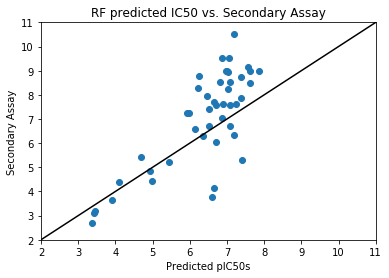

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt



task = "pIC50"
rf_predicted_test = best_rf.predict(test_dataset)
rf_true_test = test_dataset.y
plt.scatter(rf_predicted_test, rf_true_test)
plt.xlabel('Predicted pIC50s')
plt.ylabel('Secondary Assay')
plt.title(r'RF predicted IC50 vs. Secondary Assay')
plt.xlim([2, 11])
plt.ylim([2, 11])
plt.plot([2, 11], [2, 11], color='k')
plt.show()

In [ ]:
import numpy as np

from deepchem.models.tensorflow_models.fcnet import TensorflowMultiTaskClassifier

params_dict = {"learning_rate": np.power(10., np.random.uniform(-5, -3, size=1)),
               "weight_decay_penalty": np.power(10, np.random.uniform(-6, -4, size=1)),
               "nb_epoch": [10] }
n_features = train_dataset.get_data_shape()[0]
def model_builder(model_params, model_dir):
  model = dc.models.tensorflow_models.fcnet.TensorflowMultiTaskClassifier(
    1, n_features, layer_sizes=[1000], dropouts=[.25],
    batch_size=50, **model_params)
  return model

metric = dc.metrics.Metric(dc.metrics.roc_auc_score)

optimizer = dc.hyper.HyperparamOpt(model_builder)
best_dnn, best_dnn_hyperparams, all_dnn_results = optimizer.hyperparam_search(
    params_dict, train_dataset, valid_dataset, transformers,
    metric=metric)

In [ ]:
dnn_train_csv_out = "dnn_train_classifier.csv"
dnn_train_stats_out = "dnn_train_classifier_stats.txt"
dnn_train_evaluator = Evaluator(best_dnn, train_dataset, transformers)
dnn_train_score = dnn_train_evaluator.compute_model_performance(
    [metric], dnn_train_csv_out, dnn_train_stats_out)
print("DNN Train set AUC %f" % (dnn_train_score["roc_auc_score"]))

dnn_valid_csv_out = "dnn_valid_classifier.csv"
dnn_valid_stats_out = "dnn_valid_classifier_stats.txt"
dnn_valid_evaluator = Evaluator(best_dnn, valid_dataset, transformers)
dnn_valid_score = dnn_valid_evaluator.compute_model_performance(
    [metric], dnn_valid_csv_out, dnn_valid_stats_out)
print("DNN Valid set AUC %f" % (dnn_valid_score["roc_auc_score"]))

dnn_test_csv_out = "dnn_test_classifier.csv"
dnn_test_stats_out = "dnn_test_classifier_stats.txt"
dnn_test_evaluator = Evaluator(best_dnn, test_dataset, transformers)
dnn_test_score = dnn_test_evaluator.compute_model_performance(
    [metric], dnn_test_csv_out, dnn_test_stats_out)
print("DNN Test set AUC %f" % (dnn_test_score["roc_auc_score"]))

dnn_crystal_csv_out = "dnn_crystal_classifier.csv"
dnn_crystal_stats_out = "dnn_crystal_stats_classifier.txt"
dnn_crystal_evaluator = Evaluator(best_dnn, crystal_dataset, transformers)
dnn_crystal_score = dnn_crystal_evaluator.compute_model_performance(
    [metric], dnn_crystal_csv_out, dnn_crystal_stats_out)
print("DNN Crystal set AUC %f" % (dnn_crystal_score["roc_auc_score"]))

In [ ]:
featurizer = dc.feat.UserDefinedFeaturizer(user_specified_features)
loader = dc.data.UserCSVLoader(
    tasks=["pIC50"], smiles_field="mol", id_field="CID",
    featurizer=featurizer)
dataset = loader.featurize(dataset_file)
crystal_dataset = loader.featurize(crystal_dataset_file)

In [ ]:
splitter = dc.splits.SpecifiedSplitter(dataset_file, "Model")
train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(
    dataset)
#NOTE THE RENAMING:
valid_dataset, test_dataset = test_dataset, valid_dataset

In [ ]:
transformers = [
    dc.trans.NormalizationTransformer(transform_X=True, dataset=train_dataset),
    dc.trans.ClippingTransformer(transform_X=True, dataset=train_dataset)]

datasets = [train_dataset, valid_dataset, test_dataset, crystal_dataset]
for i, dataset in enumerate(datasets):
  for transformer in transformers:
      datasets[i] = transformer.transform(dataset)
train_dataset, valid_dataset, test_dataset, crystal_dataset = datasets

In [ ]:
params_dict = {"learning_rate": np.power(10., np.random.uniform(-5, -3, size=2)),
               "weight_decay_penalty": np.power(10, np.random.uniform(-6, -4, size=2)),
               "nb_epoch": [20] }
n_features = train_dataset.get_data_shape()[0]
def model_builder(model_params, model_dir):
  model = dc.models.MultiTaskRegressor(
    1, n_features, layer_sizes=[1000], dropouts=[.25],
    batch_size=50, **model_params)
  return model

optimizer = dc.hyper.HyperparamOpt(model_builder)
best_dnn, best_dnn_hyperparams, all_dnn_results = optimizer.hyperparam_search(
    params_dict, train_dataset, valid_dataset, transformers,
    metric=metric)

In [ ]:
dnn_train_csv_out = "dnn_train_regressor.csv"
dnn_train_stats_out = "dnn_train_regressor_stats.txt"
dnn_train_evaluator = Evaluator(best_dnn, train_dataset, transformers)
dnn_train_score = dnn_train_evaluator.compute_model_performance(
    [metric], dnn_train_csv_out, dnn_train_stats_out)
print("DNN Train set R^2 %f" % (dnn_train_score["r2_score"]))

dnn_valid_csv_out = "dnn_valid_regressor.csv"
dnn_valid_stats_out = "dnn_valid_regressor_stats.txt"
dnn_valid_evaluator = Evaluator(best_dnn, valid_dataset, transformers)
dnn_valid_score = dnn_valid_evaluator.compute_model_performance(
    [metric], dnn_valid_csv_out, dnn_valid_stats_out)
print("DNN Valid set R^2 %f" % (dnn_valid_score["r2_score"]))

dnn_test_csv_out = "dnn_test_regressor.csv"
dnn_test_stats_out = "dnn_test_regressor_stats.txt"
dnn_test_evaluator = Evaluator(best_dnn, test_dataset, transformers)
dnn_test_score = dnn_test_evaluator.compute_model_performance(
    [metric], dnn_test_csv_out, dnn_test_stats_out)
print("DNN Test set R^2 %f" % (dnn_test_score["r2_score"]))

dnn_crystal_csv_out = "dnn_crystal_regressor.csv"
dnn_crystal_stats_out = "dnn_crystal_stats_regressor.txt"
dnn_crystal_evaluator = Evaluator(best_dnn, crystal_dataset, transformers)
dnn_crystal_score = dnn_crystal_evaluator.compute_model_performance(
    [metric], dnn_crystal_csv_out, dnn_crystal_stats_out)
print("DNN Crystal set R^2 %f" % (dnn_crystal_score["r2_score"]))